In [1]:
#Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Import Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Filter for US

df_US = df[df['job_country'] == 'United States']

In [3]:
#Explode the data

df_skills = df_US.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count.sort_values(by = 'skill_count', ascending = False, inplace = True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [6]:
#Get the top 3 job titles

job_titles = df_skills_count['job_title_short'].unique().tolist()[:3]
job_titles = sorted(job_titles)

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

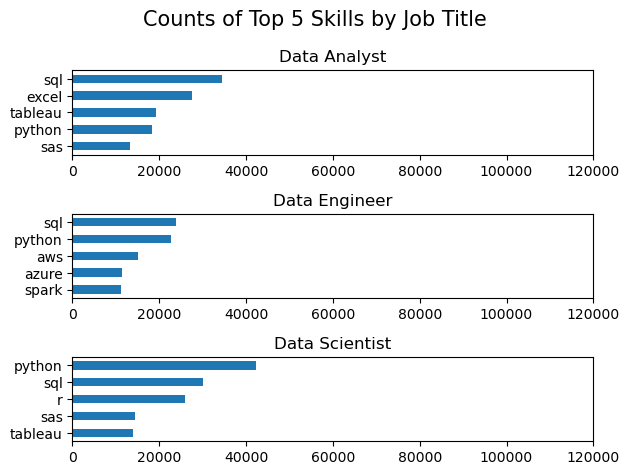

In [7]:
#Create subplots of skills for three job titles (from Advanced lesson 13)

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):                                                             #Loop through each title in the job_titles list
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)                 #Filter for the 5 most frequent skills for the job title
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_count', ax = ax[i], title = job_title)    #Creates the plot with ax[i] specifying the index of the job_titles list
    ax[i].invert_yaxis()                                                                               #Inverts the y-axis to display the skill counts in descending order
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)                                                                          #Sets the min and max values for the axis

fig.suptitle('Counts of Top 5 Skills by Job Title', fontsize = 15)
fig.tight_layout()

In [9]:
#Get the total number of job postings for each role

df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name = 'jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [11]:
#Merge the totals with the skill counts

df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how = 'left', on = 'job_title_short')

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [13]:
#Calculate the percentages

df_skills_perc['skill_percent'] = df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


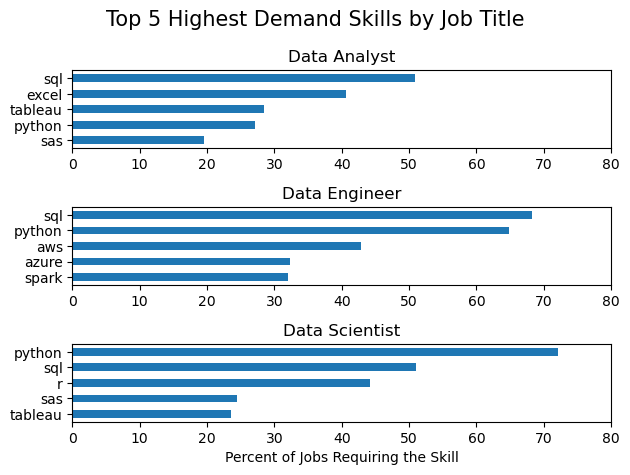

In [16]:
#Plot the percentages

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y = 'skill_percent', ax = ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 80)
ax[2].set_xlabel('Percent of Jobs Requiring the Skill')

fig.suptitle('Top 5 Highest Demand Skills by Job Title', fontsize = 15)
fig.tight_layout()

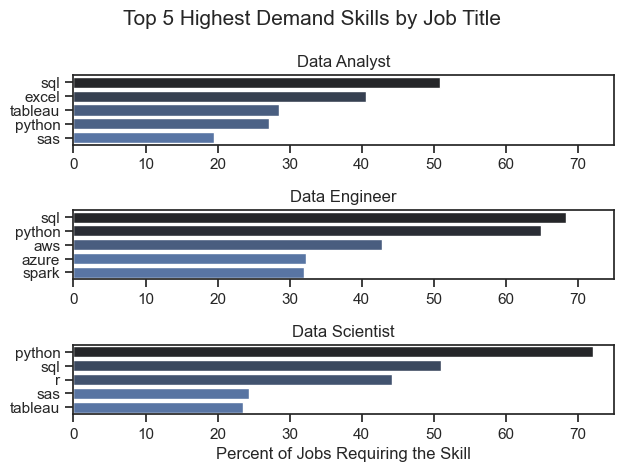

In [24]:
#Format with Seaborn

import seaborn as sns

sns.set_theme(style = 'ticks')
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data = df_plot, x = 'skill_percent', y = 'job_skills', ax = ax[i], hue = 'skill_percent', palette = 'dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 75)
ax[2].set_xlabel('Percent of Jobs Requiring the Skill')

fig.suptitle('Top 5 Highest Demand Skills by Job Title', fontsize = 15)
fig.tight_layout()

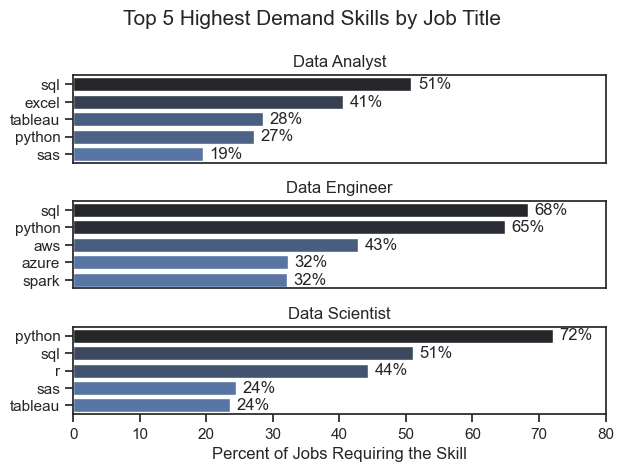

In [25]:
#Extra formatting to display exact percentages

import seaborn as sns

sns.set_theme(style = 'ticks')
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data = df_plot, x = 'skill_percent', y = 'job_skills', ax = ax[i], hue = 'skill_percent', palette = 'dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 80)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va = 'center')                  #Add percentage values for each bar
    
    if i < len(job_titles) - 1:
        ax[i].set_xticks([])                                              #Put xticks on the bottom plot only

ax[2].set_xlabel('Percent of Jobs Requiring the Skill')

fig.suptitle('Top 5 Highest Demand Skills by Job Title', fontsize = 15)
fig.tight_layout()